0
1
2
3


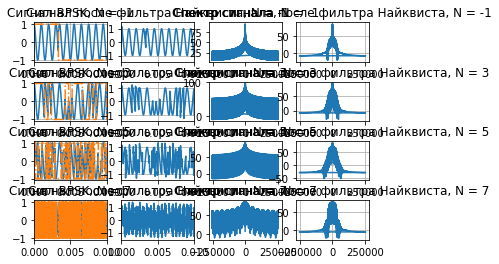

In [ ]:
import numpy as np
from scipy.fft import *
import typing as tp
from scipy.signal import butter, lfilter,welch

import matplotlib.pyplot as plt
import math
from scipy import fftpack
def BPSK_SPC(fr, SAMPLE, DUR, n, k, sign, plotov):
    print(k)

    def shift(arr: tp.List[int]) -> tp.List[int]:
        for i in reversed(range(1, len(arr))):
            arr[i] = arr[i - 1]

        return arr

    def m_seq(sig: tp.List[int], n: int) -> tp.List[int]:
        arr = []
        arr2 = []
        reg = [0 for _ in range(n)]
        reg[0] = 1

        for i in range((2 ** n) - 1):
            arr.append(reg[n - 1])
            # print(reg)
            temp = reg[n - 1] ^ reg[n - 2]
            reg = shift(reg)
            reg[0] = temp

        for i in sig:
            if i == 0:
                for i in arr:
                    arr2.append(i)
                    


            else:
                for i in reversed(arr):
                    arr2.append(i)
                    

        return arr2

    sig_n = sign
    if n > 1:
        sig = m_seq(sig_n, n)
    else:
        sig = sig_n

    f = fr

    SAMPLE_RATE = SAMPLE
    DURATION = DUR

    #X = np.linspace(0, DURATION, SAMPLE_RATE , endpoint=False)
    # print(X)
    # print(len(X),len(sig))
    # print( len(X) // len(sig))
    def generate_cos_wave(freq, sample_rate, duration):
        x = np.linspace(0, duration,int(sample_rate * duration), endpoint=False)
        frequencies = x * freq
        # 2pi для преобразования в радианы
        y = np.cos((2 * np.pi) * frequencies)
        return x, y

    X, COS = generate_cos_wave(f, SAMPLE_RATE, DURATION)



    SIG = []
    for j in sig:
        for i in range(len(X) // len(sig)):
            if j == 0:
                SIG.append(-1)
            else:
                SIG.append(1)
    # print(len(SIG)- len(X))
    X = X[:len(X) - (len(X) - len(SIG))]
    COS = COS[:len(X)]
    # print(len(SIG), len(X))



    BPSK = COS * SIG
    def butter_lowpass(cutoff, fs, order=5):
        nyq = 0.5 * fs
        normal_cutoff = cutoff / nyq
        b, a = butter(order, normal_cutoff, btype='low', analog=False)
        return b, a

    def butter_lowpass_filter(data, cutoff, fs, order=5):
        b, a = butter_lowpass(cutoff, fs, order=order)
        y = lfilter(b, a, data)
        return y

    new_bpsk = butter_lowpass_filter(BPSK, 55, f, 8)

    N = len(BPSK)

    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)

    # print(len(yf) - len(xf))

    t = 100 * 10 ** -4





    plt.subplot(plotov, 4, 1 + k * 4)
    plt.grid()
    title = 'Cигнал BPSK, N = ' + str(n)
    plt.title(title)
    # fontsize=16
    plt.plot(X, BPSK)
    plt.plot(X, SIG, linestyle='-.')
    plt.xlim([0, t])
    ################################

    plt.subplot(plotov, 4, 2 + k * 4)
    plt.grid()
    title = 'Cигнал после фильтра Найквиста, N = ' + str(n)
    plt.title(title)
    plt.plot(X, new_bpsk)
    plt.xlim([0, t])
    ################################

    plt.subplot(plotov, 4, 3 + k * 4)
    # plot(X, BPSK)
    # plt.xlim([0, t])
    range1 = 100 * 10 ** 3
    xf = fftpack.fftfreq(len(BPSK)) * SAMPLE_RATE
    yf1 = abs(fftpack.fft(BPSK))
    # ,norm="forward"
    if n <= 1:
        global yl
        yl = max(yf1)
    ref = (1 / np.sqrt(2) ** 2)
    yf1 = 20 * np.log10(yf1/ref)

    range1 = 40 * 10 ** 3
    #plt.xlim([-range1, range1])

    # plt.ylim(0,yl)
    #plt.ylim(-90)
    # plt.grid()
    title = 'Спектр сигнала, N = ' + str(n)
    plt.title(title)

    plt.plot(xf, yf1)

    ################################

    segment_size = 10000




    noverlap = segment_size / 2
    f, Pxx = welch(new_bpsk,  # signal
                          fs=SAMPLE_RATE,  # sample rate
                          nperseg=segment_size,  # segment size
                          window='hanning',  # window type to use
                          nfft=segment_size,  # num. of samples in FFT
                          detrend=False,  # remove DC part
                          scaling='spectrum',  # return power spectrum [V^2]
                          noverlap=noverlap,
                          return_onesided= False)  # overlap between segments

    # set 0 dB to energy of sine wave with maximum amplitude
    ref = (1 / np.sqrt(2) ** 2)  # simply 0.5 ;)
    p = 10 * np.log10(Pxx / ref)






    xf = fftpack.fftfreq(len(BPSK)) * SAMPLE_RATE
    yf = abs(fftpack.fft(new_bpsk))
    if n <= 1:
        global yl1
        yl1 = max(yf) * 2

    yf = 20 * np.log10(yf)
    plt.subplot(plotov, 4, 4 + k * 4)
    range1 = 30 * 10 ** 3
    #plt.xlim([-range1, range1])

    # plt.ylim(0,yl1)
    #plt.ylim(-90)
    plt.grid()
    title = 'Спектр сигнала после фильтра Найквиста, N = ' + str(n)
    plt.title(title)
    plt.plot(xf, yf)
    #plt.plot(f,p)


k = 0
global yl, yl1
time = 0.5
n_sig = 150
signal = np.random.randint(0, 2, n_sig)
f = 1000
f_sample = 508 * 10 ** 3
n = [-1, 3, 5, 7]

for i in n:
    BPSK_SPC(f, f_sample, time, i, k, signal, len(n))
    k += 1

plt.show()
